In [15]:
import seaborn as sns
import pandas as pd

## Cria o frame do pandas com os dados do CSV

In [16]:
acid = pd.read_csv('./data/cat_acidentes.csv', sep=';')

In [17]:
acid.head()

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2024-08-01 01:32:25,0.0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,...,0.0,0.000000e+00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÃBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2024-08-01 01:32:25,6699.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,3,...,-817840587.0,1.295680e+09,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÃ‡A-FEIRA,02:45:00.0000000,NOITE,NORTE,NaN
2,2024-08-01 01:32:25,411.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,2,...,-826760803.0,1.292030e+09,R DR BARROS CASSAL,NaN,ABALROAMENTO,TERÃ‡A-FEIRA,07:36:00.0000000,DIA,CENTRO,NaN
3,2024-08-01 01:32:25,1500.0,0.0,2019-01-01 00:00:00,4,2,0,0,0,1,...,-827227451.0,1.285404e+09,AV FABIO ARAUJO SANTOS,NaN,CHOQUE,TERÃ‡A-FEIRA,16:50:00.0000000,DIA,SUL,NaN
4,2024-08-01 01:32:25,8799.0,0.0,2019-01-01 00:00:00,5,0,0,0,0,3,...,-820146494.0,1.288712e+09,AV IPIRANGA,NaN,COLISÃƒO,TERÃ‡A-FEIRA,19:00:00.0000000,NOITE,LESTE,NaN


## Conta a incidência por rua

In [18]:
acid.log1.value_counts().head(30)

log1
AV PROTASIO ALVES                    2090
AV IPIRANGA                          1868
AV ASSIS BRASIL                      1731
AV BENTO GONCALVES                   1418
AV SERTORIO                          1121
AV IPIRANGA                           948
AV PROTASIO ALVES                     930
AV PROF OSCAR PEREIRA                 905
AV ASSIS BRASIL                       845
ESTR JOAO DE OLIVEIRA REMIAO          744
AV CAVALHADA                          727
AV BENTO GONCALVES                    688
AV JUCA BATISTA                       666
AV BALTAZAR DE OLIVEIRA GARCIA        641
AV SERTORIO                           615
AV EDGAR PIRES DE CASTRO              565
AV FARRAPOS                           546
ESTR JOAO ANTONIO SILVEIRA            514
AV JOAO PESSOA                        498
AV CRISTOVAO COLOMBO                  468
AV CARLOS GOMES                       466
AV DR NILO PECANHA                    427
AV WENCESLAU ESCOBAR                  411
AV ANTONIO CARVALHO          

## Agrupa as ruas iguais

In [19]:
acid.loc[:,'log1'] = acid.loc[:,'log1'].apply(lambda x: str(x).strip())

In [20]:
acid.log1.value_counts().head(30)

log1
AV PROTASIO ALVES                   3020
AV IPIRANGA                         2816
AV ASSIS BRASIL                     2576
AV BENTO GONCALVES                  2106
AV SERTORIO                         1736
AV PROF OSCAR PEREIRA               1236
ESTR JOAO DE OLIVEIRA REMIAO         983
AV JUCA BATISTA                      922
AV BALTAZAR DE OLIVEIRA GARCIA       920
AV FARRAPOS                          887
AV JOAO PESSOA                       735
AV CAVALHADA                         727
AV EDGAR PIRES DE CASTRO             709
AV CRISTOVAO COLOMBO                 670
ESTR JOAO ANTONIO SILVEIRA           655
AV DR NILO PECANHA                   625
AV CARLOS GOMES                      624
AV WENCESLAU ESCOBAR                 544
AV ANTONIO CARVALHO                  523
R VOLUNTARIOS DA PATRIA              523
AV CEL APARICIO BORGES               496
AV BORGES DE MEDEIROS                493
AV PRESIDENTE CASTELO BRANCO         485
AV CEARA                             479
AV OSVALDO 

## Cria uma ordenação e exibe o gráfico das ruas

<Axes: xlabel='count', ylabel='log1'>

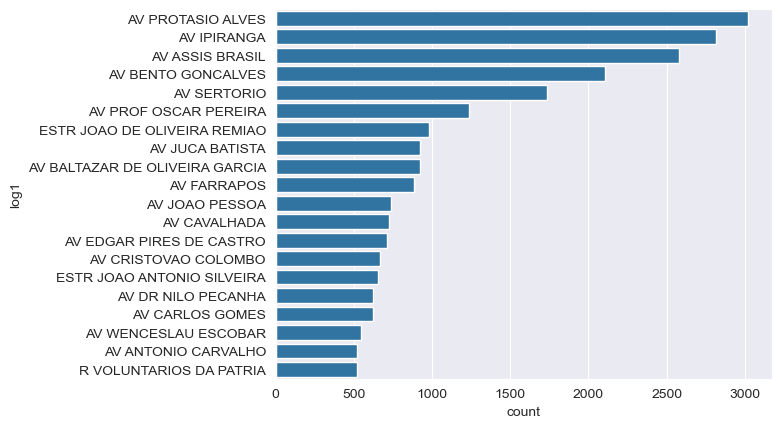

In [21]:
acid_order=acid.groupby('log1')['log1'].count().sort_values(ascending=False).iloc[0:20].index.values
sns.countplot(data=acid, y='log1', order=acid_order)

## Exibe o gráfico do período do dia

In [22]:
acid.head()

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2024-08-01 01:32:25,0.0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,...,0.0,0.000000e+00,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÃBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2024-08-01 01:32:25,6699.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,3,...,-817840587.0,1.295680e+09,AV ASSIS BRASIL,NaN,ABALROAMENTO,TERÃ‡A-FEIRA,02:45:00.0000000,NOITE,NORTE,NaN
2,2024-08-01 01:32:25,411.0,0.0,2019-01-01 00:00:00,1,0,0,0,0,2,...,-826760803.0,1.292030e+09,R DR BARROS CASSAL,NaN,ABALROAMENTO,TERÃ‡A-FEIRA,07:36:00.0000000,DIA,CENTRO,NaN
3,2024-08-01 01:32:25,1500.0,0.0,2019-01-01 00:00:00,4,2,0,0,0,1,...,-827227451.0,1.285404e+09,AV FABIO ARAUJO SANTOS,NaN,CHOQUE,TERÃ‡A-FEIRA,16:50:00.0000000,DIA,SUL,NaN
4,2024-08-01 01:32:25,8799.0,0.0,2019-01-01 00:00:00,5,0,0,0,0,3,...,-820146494.0,1.288712e+09,AV IPIRANGA,NaN,COLISÃƒO,TERÃ‡A-FEIRA,19:00:00.0000000,NOITE,LESTE,NaN


## Cria o periodo do dia

In [23]:
# Extrair a hora como número inteiro
acid.loc[:, 'hora_int'] = pd.to_numeric(acid.hora.str[:2], errors='coerce')

# Função para categorizar períodos
def categorizar_periodo(hora):
    if pd.isnull(hora):
        return 'Desconhecido'
    elif 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 22:
        return 'Noite'
    else:
        return 'Madrugada'

# Aplicar a categorização
acid.loc[:, 'periodo_do_dia'] = acid.hora_int.apply(categorizar_periodo)

## Ordena e exibe o gráfico

In [24]:
periodo_order = acid.periodo_do_dia.value_counts().index

<Axes: xlabel='periodo_do_dia', ylabel='count'>

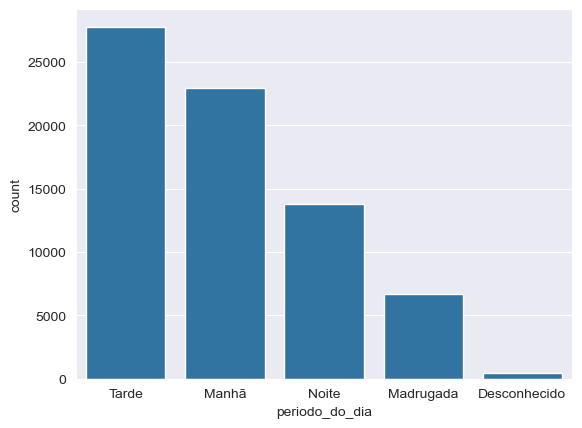

In [25]:
sns.countplot(data=acid, x='periodo_do_dia', order=periodo_order)